In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
import scanorama

# sittings
sns.set_style("ticks",{'axes.grid' : True})

# Load the data
Read the h5ad file we saved in the preprocessing and integration

In [2]:
# Load the saved AnnData object after Integrating
adata = sc.read_h5ad("characterized.h5ad")

adata

AnnData object with n_obs × n_vars = 157422 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type', 'treatment', 'procedure', 'moffitt', 'stage'
    uns: 'Sample_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'markers', 'moffitt_colors', 'neighbors', 'procedure_colors', 'rank_genes_groups', 'stage_colors', 'treatment_colors', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

# Filter out the non cancer-associated fibroblast cells

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


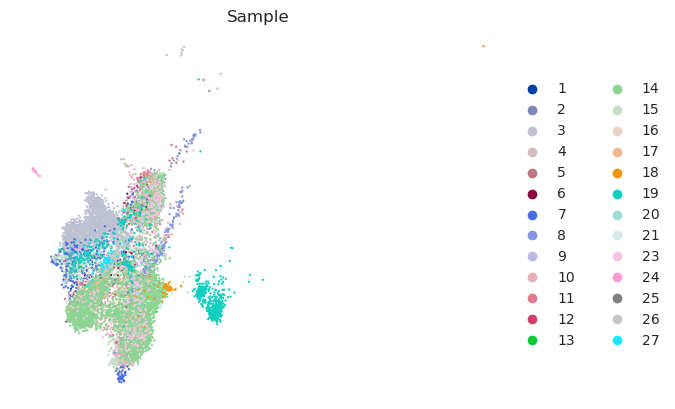

View of AnnData object with n_obs × n_vars = 11048 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type', 'treatment', 'procedure', 'moffitt', 'stage'
    uns: 'Sample_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'markers', 'moffitt_colors', 'neighbors', 'procedure_colors', 'rank_genes_groups', 'stage_colors', 'treatment_colors', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

In [3]:
# Filter to allow only the cancer-associated fibroblast cells
adata = adata[adata.obs.cell_type == 'CAFs']

# Plot the UMAP of the cancer-associated fibroblast cells
sc.pl.umap(adata, color = ['Sample'], frameon = False)

adata

# Remove the points far from the center

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


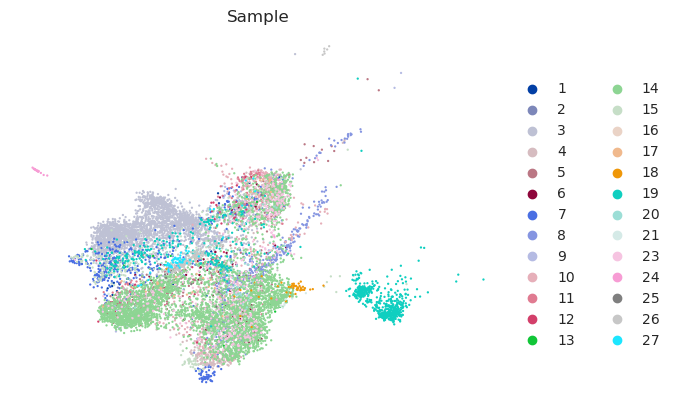

View of AnnData object with n_obs × n_vars = 11047 × 16975
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'cell_type', 'treatment', 'procedure', 'moffitt', 'stage'
    uns: 'Sample_colors', 'cell_type_colors', 'leiden', 'leiden_colors', 'markers', 'moffitt_colors', 'neighbors', 'procedure_colors', 'rank_genes_groups', 'stage_colors', 'treatment_colors', 'umap'
    obsm: 'Scanorama', 'X_scanorama', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
# identify the top farest points from the centroid on the umap
umap_coords = adata.obsm["X_umap"]
umap_outlayer = adata.obs_names[np.argsort(np.linalg.norm(umap_coords - umap_coords.mean(axis=0), axis=1))[::-1][:1]] # only one outlayer

# Remove the umap outlayers
adata = adata[~adata.obs_names.isin(umap_outlayer)]

# Plot the UMAP of the cancer-associated fibroblast cells without the outlayers
sc.pl.umap(adata, color = ['Sample'], frameon = False)

adata

# Categorize the CAFs according to their subtype using marker genes 
* myCAF marker genes ACTA2, MMP11 and COL10A1
* iCAF marker genes C3, C7, CFD and PTGDS
* pericite marker genes ACTA2, RGS5 and NOTCH3
* proliferating marker gene MKI67
* peri-islet Schwann marker gene S100B
* epithelial like marker genes KRT19 and EPCAM
* chondrocyte like marker gene SPP1

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


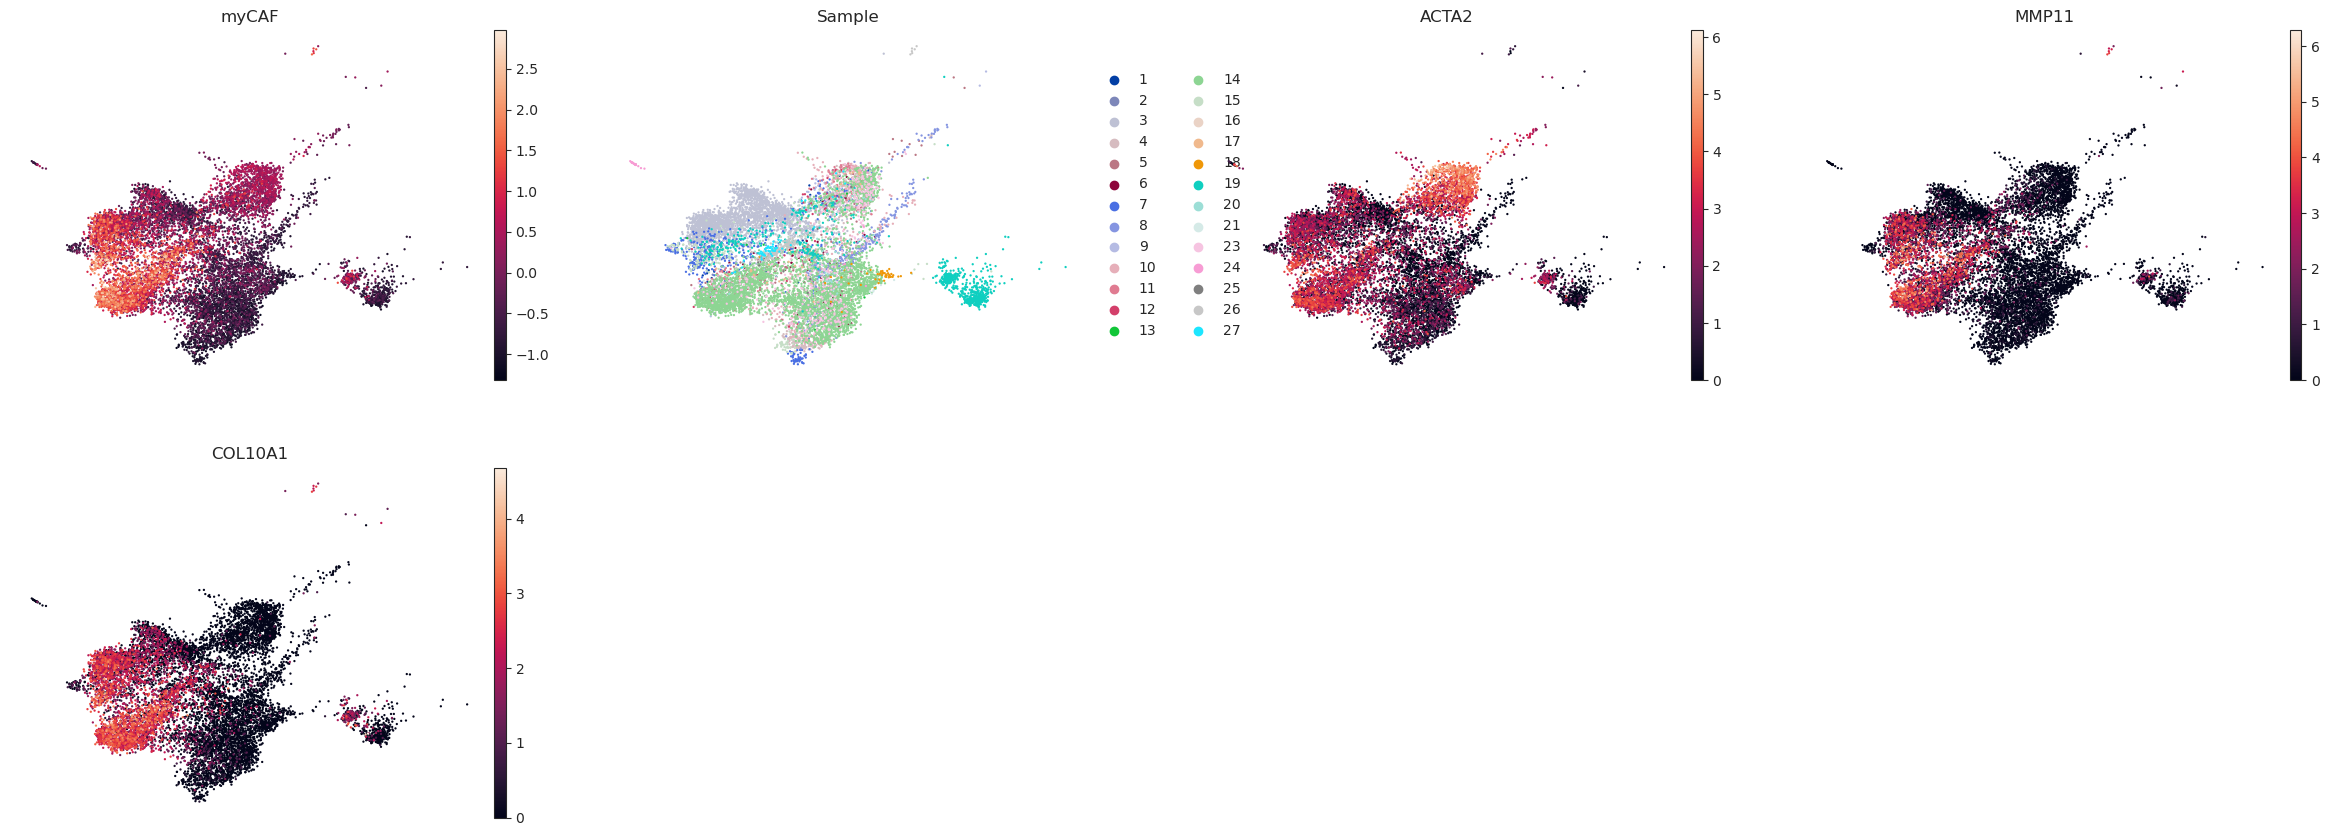

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


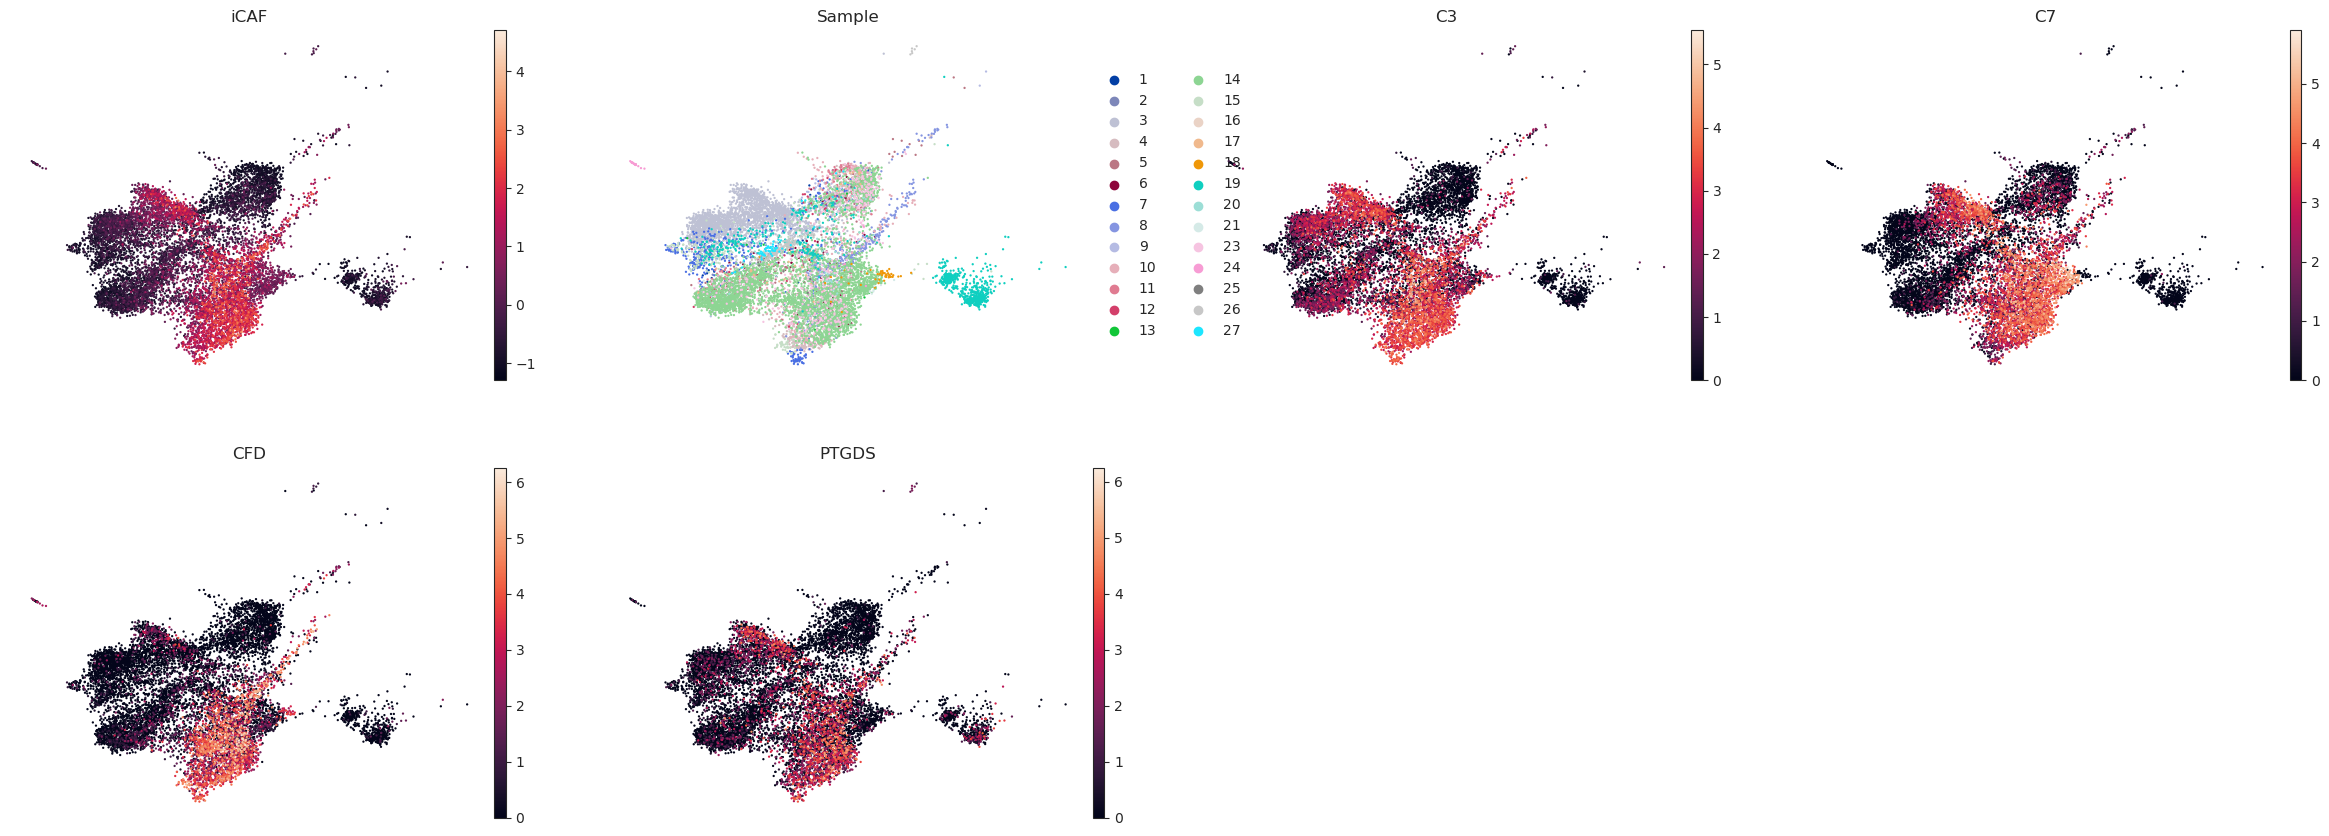

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


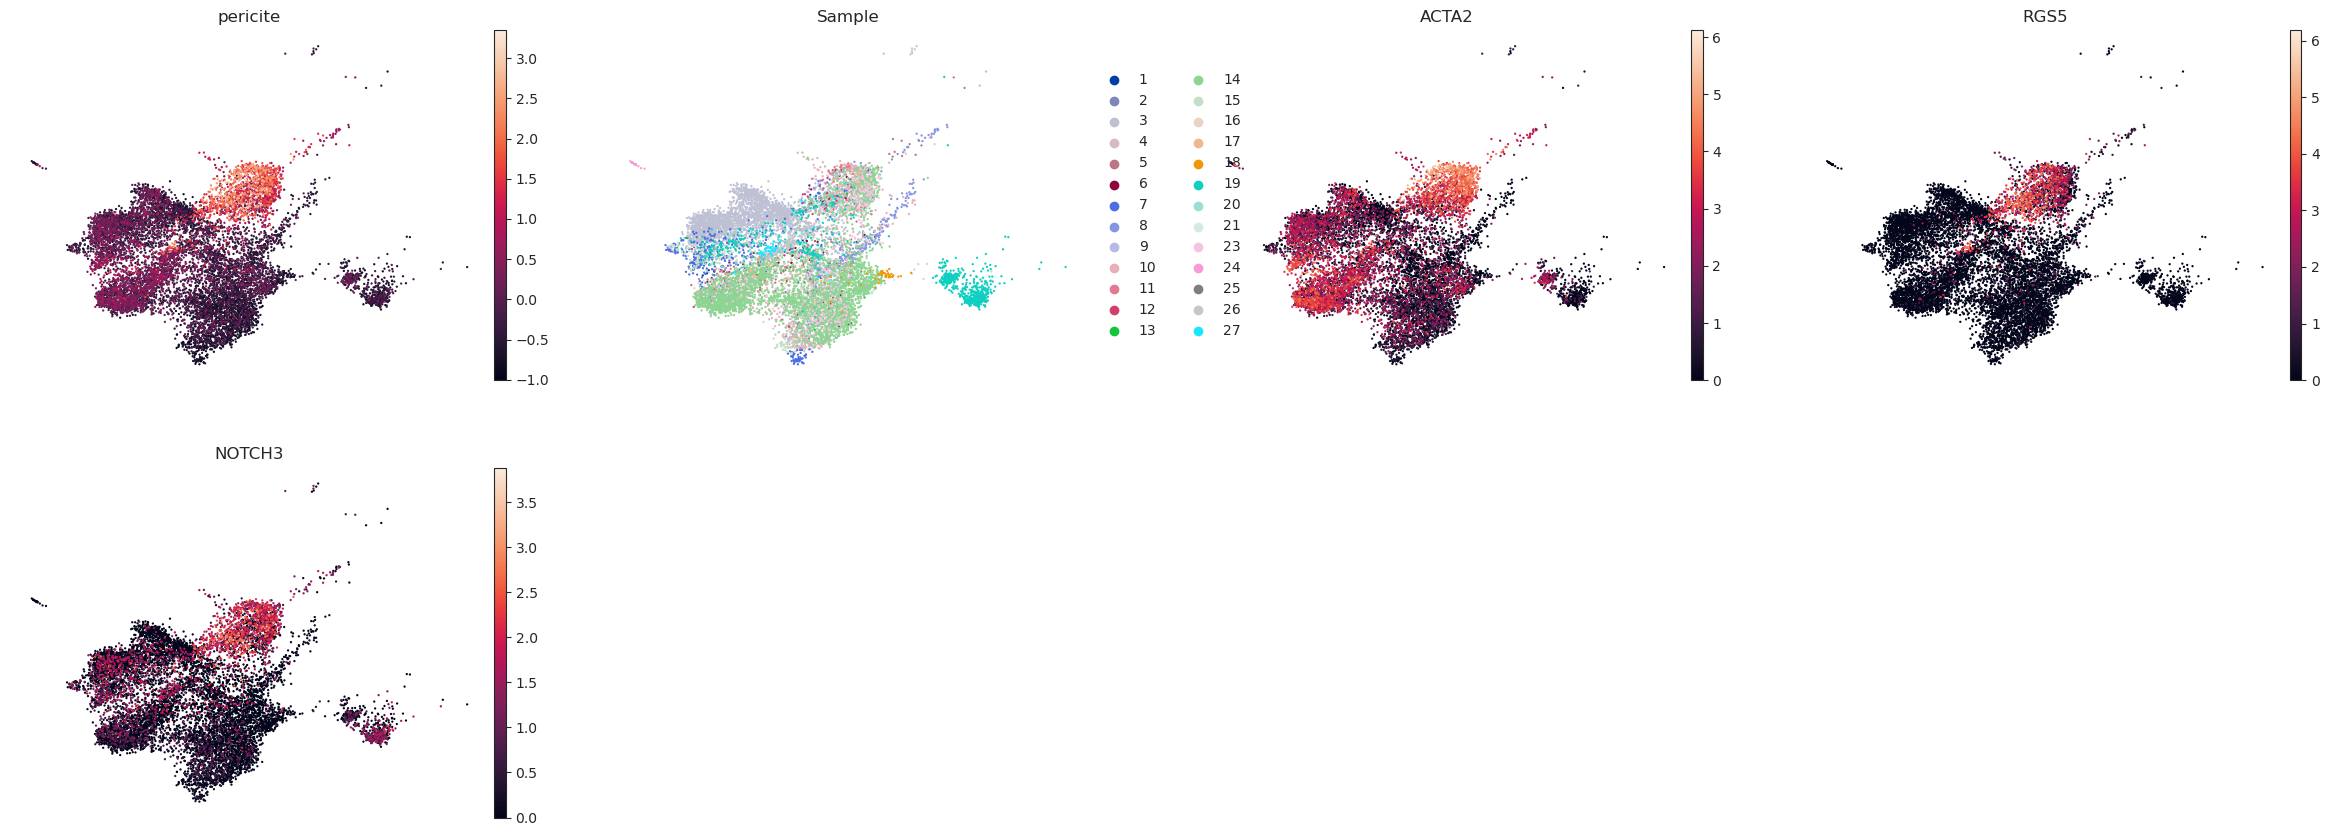

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


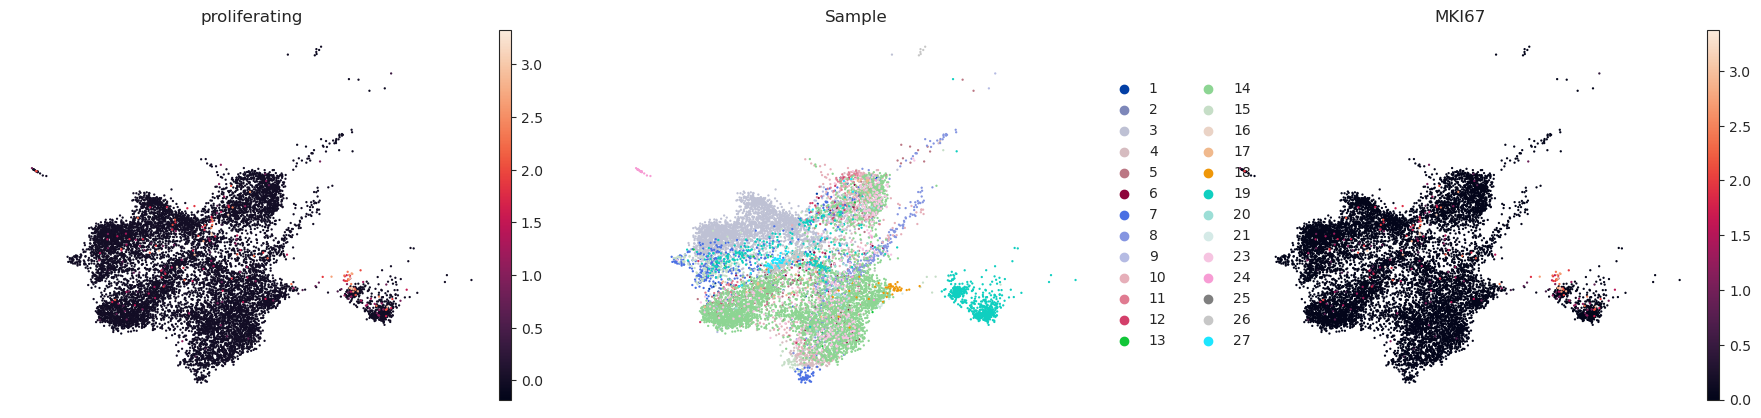

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


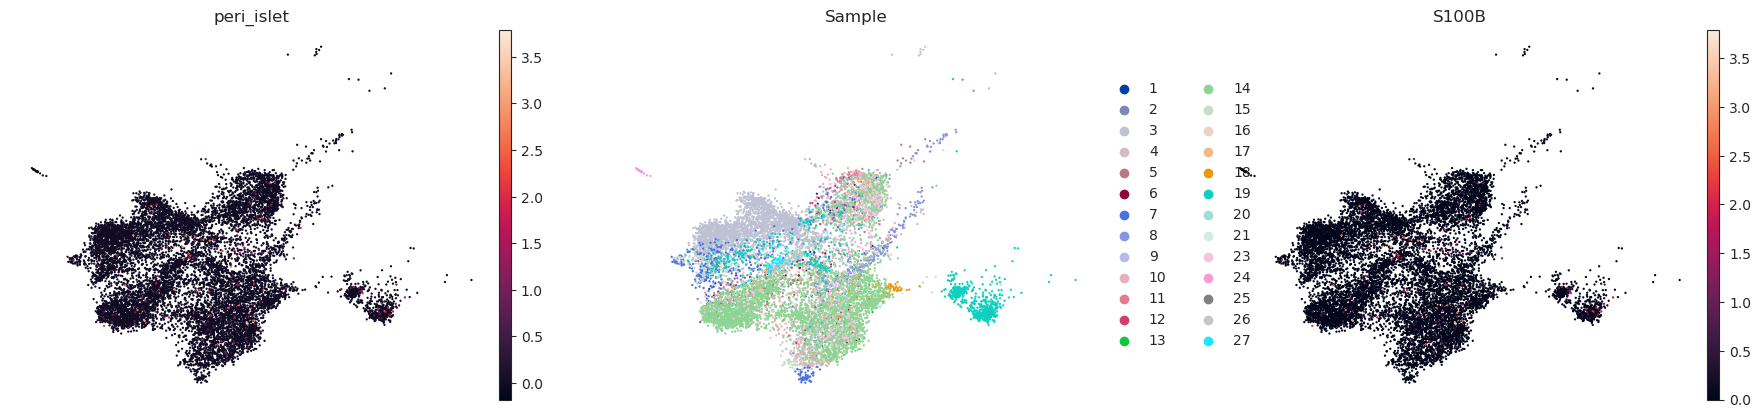

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


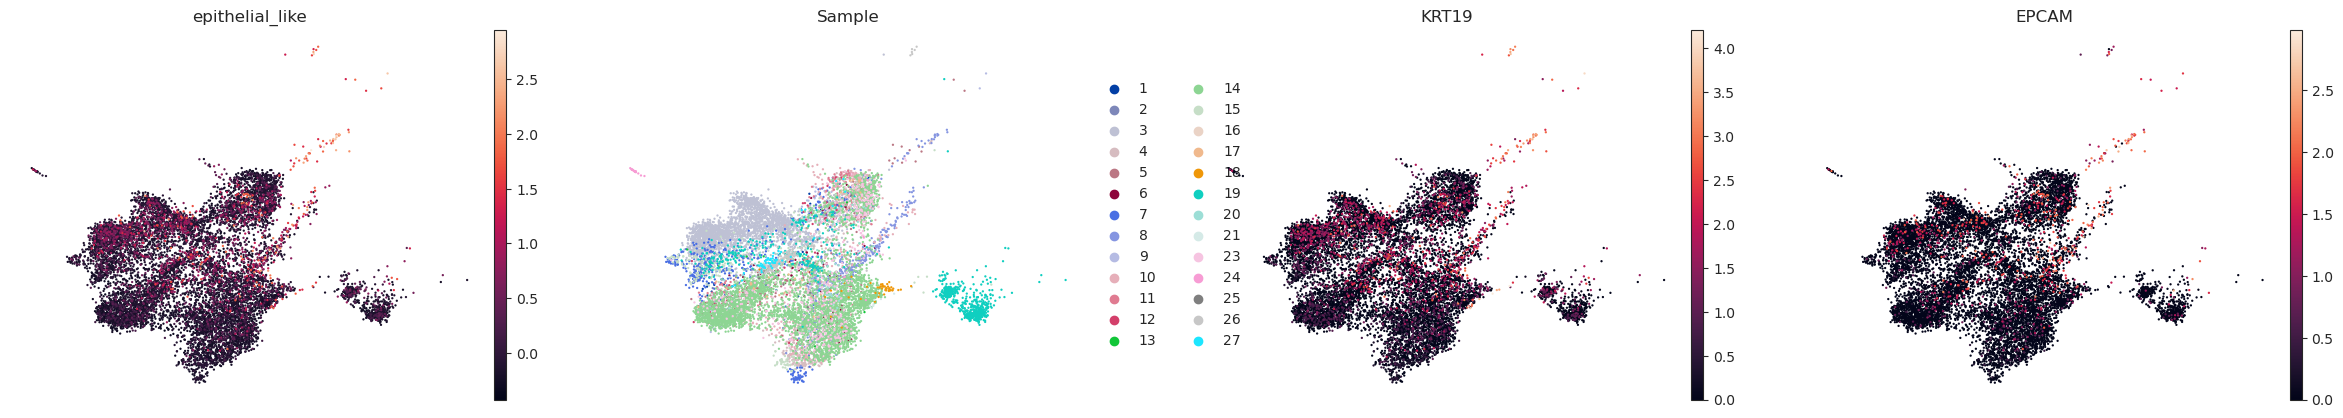

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


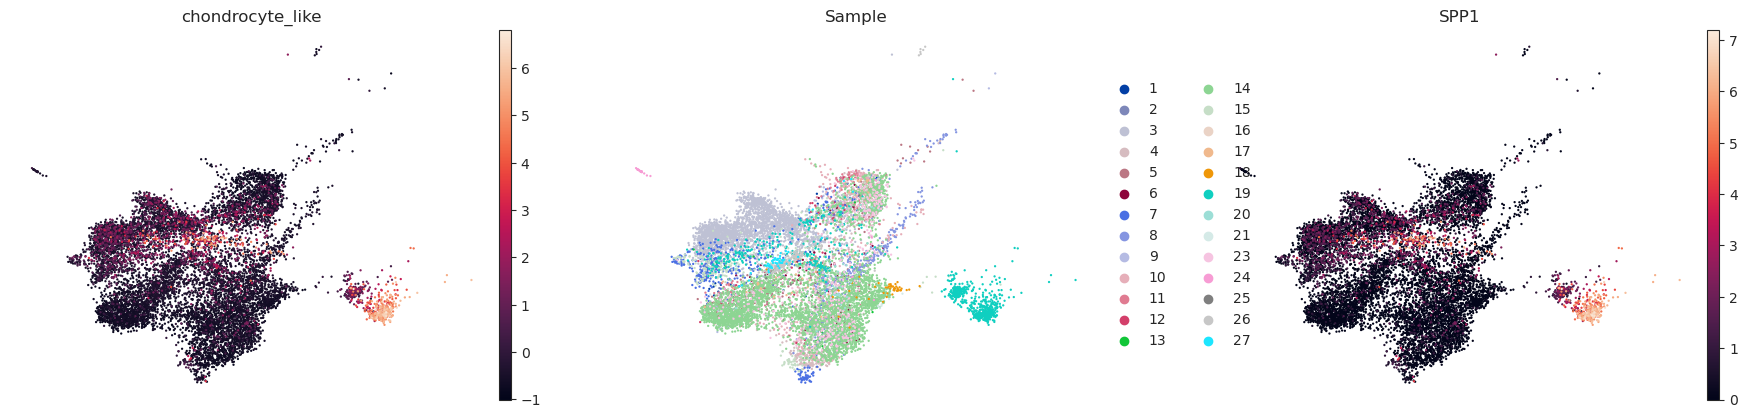

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


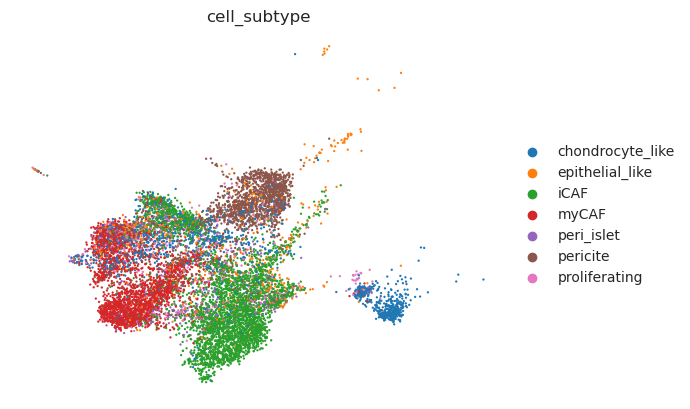

In [5]:
# Calculate cell type scores
sc.tl.score_genes(adata, gene_list=['ACTA2', 'MMP11', 'COL10A1'], score_name='myCAF')
sc.tl.score_genes(adata, gene_list=['C3', 'C7', 'CFD', 'PTGDS'], score_name='iCAF')
sc.tl.score_genes(adata, gene_list=['ACTA2', 'RGS5', 'NOTCH3'], score_name='pericite')
sc.tl.score_genes(adata, gene_list=['MKI67'], score_name='proliferating')
sc.tl.score_genes(adata, gene_list=['S100B'], score_name='peri_islet')
sc.tl.score_genes(adata, gene_list=['KRT19', 'EPCAM'], score_name='epithelial_like')
sc.tl.score_genes(adata, gene_list=['SPP1'], score_name='chondrocyte_like')

# Visualize cell type scores
sc.pl.umap(adata, color=['myCAF', 'Sample', 'ACTA2', 'MMP11', 'COL10A1'], frameon = False)
sc.pl.umap(adata, color=['iCAF', 'Sample', 'C3', 'C7', 'CFD', 'PTGDS'], frameon = False)
sc.pl.umap(adata, color=['pericite', 'Sample', 'ACTA2', 'RGS5', 'NOTCH3'], frameon = False)
sc.pl.umap(adata, color=['proliferating', 'Sample', 'MKI67'], frameon = False)
sc.pl.umap(adata, color=['peri_islet', 'Sample', 'S100B'], frameon = False)
sc.pl.umap(adata, color=['epithelial_like', 'Sample', 'KRT19', 'EPCAM'], frameon = False)
sc.pl.umap(adata, color=['chondrocyte_like', 'Sample', 'SPP1'], frameon = False)

# Identify the celltype according to maximum score
adata.obs['cell_subtype'] = adata.obs[['myCAF', 'iCAF', 'pericite', 'proliferating', 'peri_islet', 'epithelial_like', 'chondrocyte_like']].apply(lambda row: row.idxmax(), axis=1)

# Visualize the results on the UMAP of CAFs
sc.pl.umap(adata, color='cell_subtype', frameon = False)

# Save the umap image for the cell subtype

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


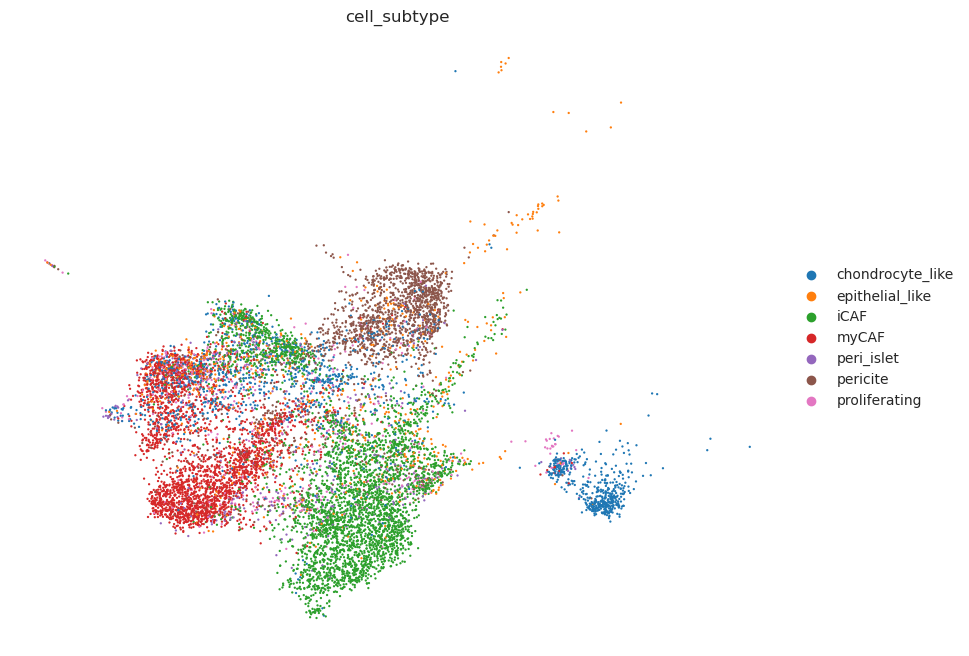

/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ahmed/anaconda3/envs/scRNA-Seq/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data f

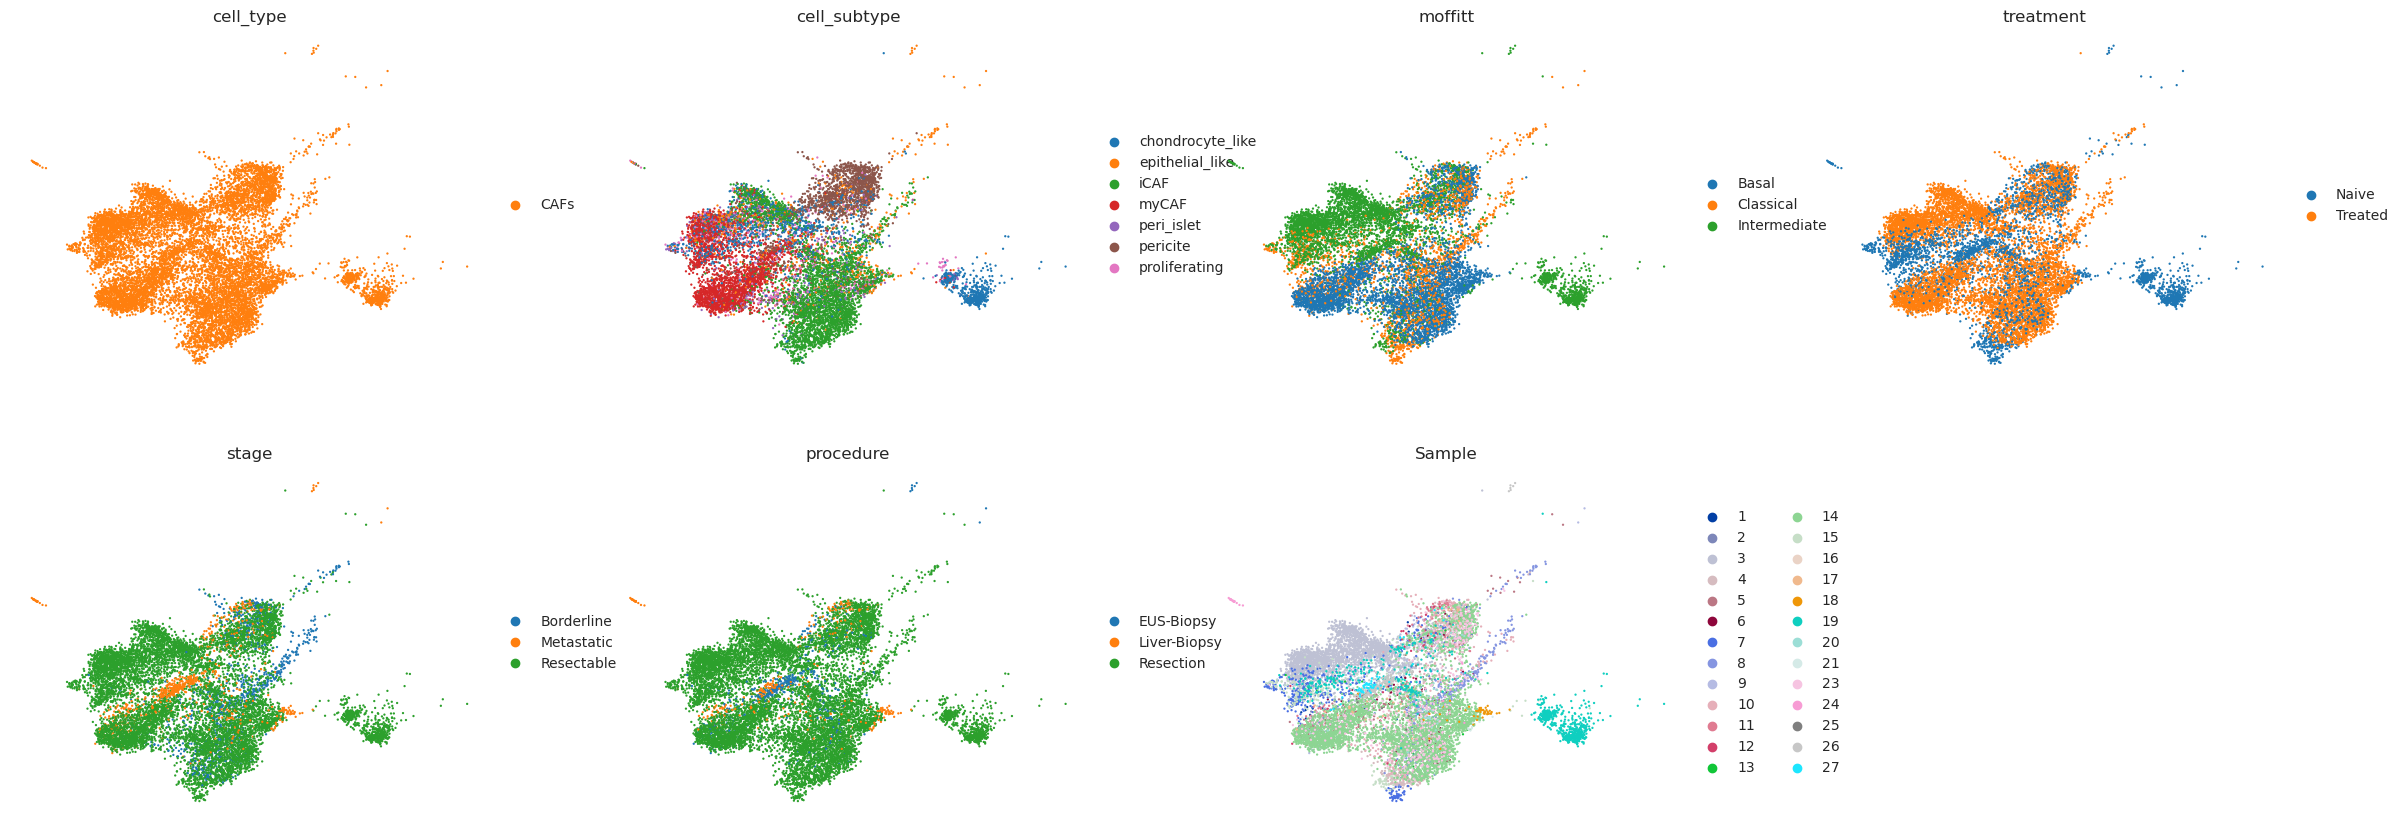

In [6]:
# UMAP epithelial subtype alone
_, axs = plt.subplots(figsize=(10,8))
sc.pl.umap(adata, color = 'cell_subtype', frameon = False, save=f"CAFs_subtype.png", ax=axs)

# UMAP of the epithelial and proliferative epithelial cells and all other categories
sc.pl.umap(adata, color = ['cell_type', 'cell_subtype', 'moffitt', 'treatment', 'stage', 'procedure', 'Sample'], frameon = False, save=f"CAFs_all.png")

# Save the AnnData object in h5ad format

In [7]:
adata.write_h5ad('CAFs_subtype.h5ad')